# Making the Most of your Colab Subscription



# Access Popular LLMs via Google-Colab-AI Without an API Key

Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
# train_cifar10_resnet18.py
import math, time, argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# ---------------- ResNet-18 (NO prebuilt model used) ----------------
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(planes)
        self.short = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.short = nn.Sequential(
                nn.Conv2d(in_planes, planes, 1, stride, bias=False),
                nn.BatchNorm2d(planes)
            )
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.short(x)
        return F.relu(out)

class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.in_planes = 64
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )
        self.layer1 = self._make_layer(64,  2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.pool   = nn.AdaptiveAvgPool2d(1)
        self.fc     = nn.Linear(512, num_classes)

    def _make_layer(self, planes, blocks, stride):
        strides = [stride] + [1]*(blocks-1)
        layers = []
        for s in strides:
            layers.append(BasicBlock(self.in_planes, planes, s))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x); x = self.layer3(x); x = self.layer4(x)
        x = self.pool(x).flatten(1)
        return self.fc(x)

# ---------------- Utils ----------------
@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    correct, total = 0, 0
    for x, y in loader:
        x = x.to(device, memory_format=torch.channels_last, non_blocking=True)
        y = y.to(device, non_blocking=True)
        pred = model(x).argmax(1)
        correct += (pred == y).sum().item()
        total += y.size(0)
    return correct / total

def cosine_lr(step, total_steps, base_lr, warmup_steps=0):
    if step < warmup_steps:
        return base_lr * step / max(1, warmup_steps)
    t = (step - warmup_steps) / max(1, total_steps - warmup_steps)
    return 0.5 * base_lr * (1 + math.cos(math.pi * t))

# ---------------- Main ----------------
def main():
    ap = argparse.ArgumentParser()
    ap.add_argument('--epochs', type=int, default=24)
    ap.add_argument('--batch_size', type=int, default=1024)
    ap.add_argument('--lr', type=float, default=0.4)  # large LR for big batch
    ap.add_argument('--warmup_epochs', type=int, default=2)
    ap.add_argument('--workers', type=int, default=2)  # Colab-friendly
    ap.add_argument('--amp', action='store_true', default=True)  # mixed precision ON
    ap.add_argument('--data', type=str, default='./data')
    args = ap.parse_args(args=[])  # makes it runnable in notebooks too

    # Device + backend settings
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    cudnn.benchmark = True

    # Data pipeline
    train_tf = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
    test_tf = transforms.ToTensor()

    train_set = datasets.CIFAR10(args.data, train=True,  download=True, transform=train_tf)
    test_set  = datasets.CIFAR10(args.data, train=False, download=True, transform=test_tf)

    train_loader = DataLoader(train_set, batch_size=args.batch_size, shuffle=True,
                              num_workers=args.workers, pin_memory=True, persistent_workers=True)
    test_loader  = DataLoader(test_set,  batch_size=1024, shuffle=False,
                              num_workers=args.workers, pin_memory=True, persistent_workers=True)

    model = ResNet18(10).to(device, memory_format=torch.channels_last)

    # Only try torch.compile if CUDA is available (avoids CPU/Mac issues)
    if torch.cuda.is_available():
        try:
            model = torch.compile(model)
        except Exception:
            pass

    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=0.9, weight_decay=5e-4)
    scaler = torch.cuda.amp.GradScaler(enabled=(args.amp and torch.cuda.is_available()))

    total_steps  = args.epochs * len(train_loader)
    warmup_steps = args.warmup_epochs * len(train_loader)
    step = 0
    best = 0.0
    t0 = time.time()

    for epoch in range(args.epochs):
        model.train()
        running = 0.0
        for x, y in train_loader:
            x = x.to(device, memory_format=torch.channels_last, non_blocking=True)
            y = y.to(device, non_blocking=True)

            # cosine LR schedule with warmup
            lr = cosine_lr(step, total_steps, args.lr, warmup_steps)
            for pg in optimizer.param_groups:
                pg['lr'] = lr

            optimizer.zero_grad(set_to_none=True)
            with torch.cuda.amp.autocast(enabled=(args.amp and torch.cuda.is_available())):
                logits = model(x)
                loss = criterion(logits, y)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running += loss.item() * x.size(0)
            step += 1

        train_loss = running / len(train_loader.dataset)
        acc = evaluate(model, test_loader, device)
        best = max(best, acc)
        print(f"Epoch {epoch+1}/{args.epochs} | loss {train_loss:.4f} | test_acc {acc*100:.2f}% | best {best*100:.2f}%")

    print(f"Total time: {time.time()-t0:.1f}s | Best acc: {best*100:.2f}%")

if __name__ == "__main__":
    main()


100%|██████████| 170M/170M [00:01<00:00, 100MB/s]
/tmp/ipython-input-2325043614.py:125: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(args.amp and torch.cuda.is_available()))
/tmp/ipython-input-2325043614.py:146: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(args.amp and torch.cuda.is_available())):
/tmp/ipython-input-2325043614.py:146: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(args.amp and torch.cuda.is_available())):


Epoch 1/24 | loss 2.0918 | test_acc 17.85% | best 17.85%


/tmp/ipython-input-2325043614.py:146: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(args.amp and torch.cuda.is_available())):


Epoch 2/24 | loss 1.6961 | test_acc 39.18% | best 39.18%
Epoch 3/24 | loss 1.5906 | test_acc 42.59% | best 42.59%
Epoch 4/24 | loss 1.3618 | test_acc 49.91% | best 49.91%
Epoch 5/24 | loss 1.2287 | test_acc 61.10% | best 61.10%
Epoch 6/24 | loss 1.1218 | test_acc 55.45% | best 61.10%
Epoch 7/24 | loss 1.0476 | test_acc 58.53% | best 61.10%
Epoch 8/24 | loss 0.9865 | test_acc 72.74% | best 72.74%
Epoch 9/24 | loss 0.9290 | test_acc 71.20% | best 72.74%
Epoch 10/24 | loss 0.8852 | test_acc 70.23% | best 72.74%
Epoch 11/24 | loss 0.8453 | test_acc 76.44% | best 76.44%
Epoch 12/24 | loss 0.8100 | test_acc 80.05% | best 80.05%
Epoch 13/24 | loss 0.7785 | test_acc 83.32% | best 83.32%
Epoch 14/24 | loss 0.7515 | test_acc 85.82% | best 85.82%
Epoch 15/24 | loss 0.7247 | test_acc 85.85% | best 85.85%
Epoch 16/24 | loss 0.6975 | test_acc 86.89% | best 86.89%
Epoch 17/24 | loss 0.6728 | test_acc 86.32% | best 86.89%
Epoch 18/24 | loss 0.6445 | test_acc 89.46% | best 89.46%
Epoch 19/24 | loss 0.6

👉 Upload keras_png_slices_data.zip


Saving keras_png_slices_data.zip to keras_png_slices_data (1).zip
✅ Unzipped to: /content/keras_png_slices_data
Device: cuda
Train/Val sizes: 9664 1120
Epoch 1/3 | train_loss 0.1158 | val_dice 0.9757 | best 0.9757
Epoch 2/3 | train_loss 0.0241 | val_dice 0.9846 | best 0.9846
Epoch 3/3 | train_loss 0.0193 | val_dice 0.9807 | best 0.9846

✅ Done. Best validation Dice: 0.9846
Showing a few validation predictions:


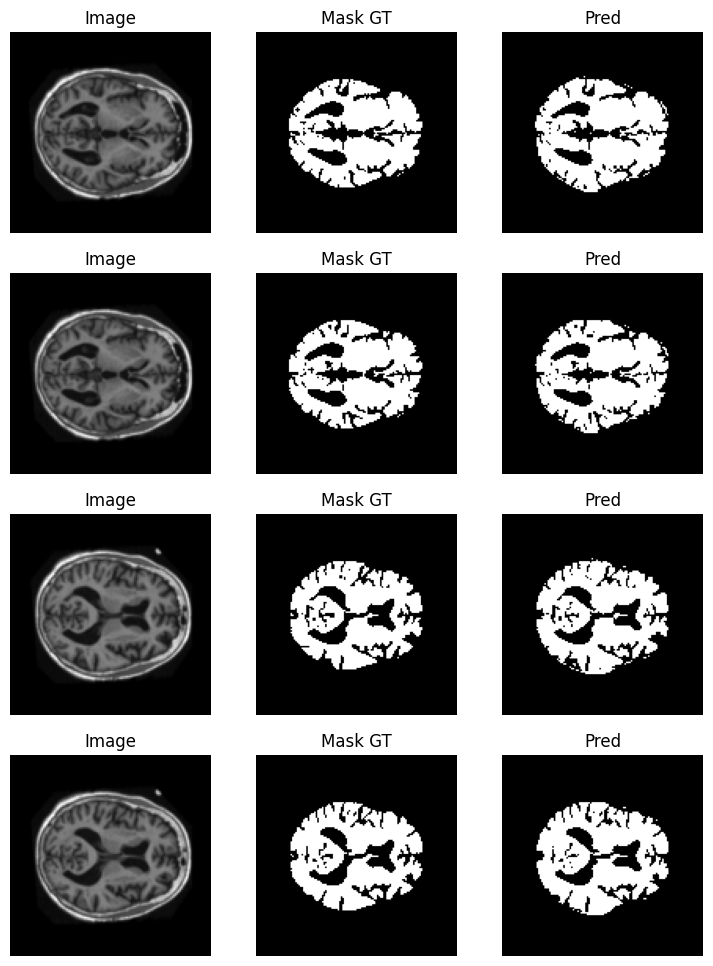

In [11]:
# ============================
# Brain MRI Segmentation (U-Net) on keras_png_slices_data.zip  — Colab
# ============================

# ---- 0) Upload & unzip ----
from google.colab import files
import zipfile, shutil
from pathlib import Path

print("👉 Upload keras_png_slices_data.zip")
uploaded = files.upload()

zip_name = next(iter(uploaded))  # first uploaded file
with zipfile.ZipFile(f"/content/{zip_name}", 'r') as zf:
    zf.extractall("/content")

data_root = Path("/content/keras_png_slices_data")
assert data_root.exists(), "Unzip failed: /content/keras_png_slices_data not found."
print("✅ Unzipped to:", data_root)

# ---- 1) Imports & config ----
import re, random, numpy as np
from PIL import Image
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
from PIL import Image as PIL_Image  # for resample enums
import matplotlib.pyplot as plt

SEED      = 42
IMG_SIZE  = 128
BATCH     = 16
EPOCHS    = 3          # set 1 for a glance; 10-20 for better Dice
LR        = 1e-3
DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

print("Device:", DEVICE)

# ---- 2) Robust pairing: case_###_slice_k  <->  seg_###_slice_k ----
ID_SLICE_RE = re.compile(r'(?:case|seg)_(\d+)_slice_(\d+)\.nii\.png$', re.IGNORECASE)

def _index_masks(msk_dir: Path):
    idx = {}
    for mp in sorted(msk_dir.glob("*.png")):
        m = ID_SLICE_RE.search(mp.name)
        if not m:
            continue
        mid, mslice = int(m.group(1)), int(m.group(2))
        idx[(mid, mslice)] = mp
    if not idx:
        raise FileNotFoundError(f"No mask PNGs found in {msk_dir}")
    return idx

def _paired_paths(split="train"):
    img_dir = data_root / f"keras_png_slices_{split}"
    msk_dir = data_root / f"keras_png_slices_seg_{split}"
    if not img_dir.exists(): raise FileNotFoundError(f"Missing images dir: {img_dir}")
    if not msk_dir.exists(): raise FileNotFoundError(f"Missing masks dir: {msk_dir}")

    mask_index = _index_masks(msk_dir)
    imgs, msks = [], []

    for ip in sorted(img_dir.glob("*.png")):
        m = ID_SLICE_RE.search(ip.name)
        if not m:
            continue
        iid, islice = int(m.group(1)), int(m.group(2))
        mp = mask_index.get((iid, islice))
        if mp is None:
            # helpful error
            raise FileNotFoundError(
                f"No mask for {ip.name} in {msk_dir}\n"
                f"Expected something like seg_{iid}_slice_{islice}.nii.png"
            )
        imgs.append(ip); msks.append(mp)

    if len(imgs) == 0:
        raise FileNotFoundError(f"No images found in {img_dir}")
    return imgs, msks

# ---- 3) Dataset ----
class KerasSlicesSegDataset(Dataset):
    def __init__(self, split="train", size=128):
        self.imgs, self.msks = _paired_paths(split)
        self.size = size
    def __len__(self): return len(self.imgs)
    def __getitem__(self, idx):
        img = Image.open(self.imgs[idx]).convert("L")
        msk = Image.open(self.msks[idx]).convert("L")  # 0/255

        img = img.resize((self.size, self.size), resample=PIL_Image.BILINEAR)
        msk = msk.resize((self.size, self.size), resample=PIL_Image.NEAREST)

        img = TF.to_tensor(img)        # [1,H,W] in [0,1]
        msk = TF.to_tensor(msk)        # [1,H,W] in [0,1]
        msk = (msk > 0.5).float()      # binarize

        return img, msk

# ---- 4) Dataloaders ----
train_ds = KerasSlicesSegDataset("train",    IMG_SIZE)
val_ds   = KerasSlicesSegDataset("validate", IMG_SIZE)
print("Train/Val sizes:", len(train_ds), len(val_ds))

train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True,  num_workers=2, pin_memory=True)
val_dl   = DataLoader(val_ds,   batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=True)

# ---- 5) Tiny U-Net ----
class DoubleConv(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
        )
    def forward(self, x): return self.net(x)

class UNetTiny(nn.Module):
    def __init__(self, ch=32):
        super().__init__()
        self.d1 = DoubleConv(1, ch)
        self.p1 = nn.MaxPool2d(2)
        self.d2 = DoubleConv(ch, ch*2)
        self.p2 = nn.MaxPool2d(2)
        self.b  = DoubleConv(ch*2, ch*4)
        self.u2 = nn.ConvTranspose2d(ch*4, ch*2, 2, stride=2)
        self.c2 = DoubleConv(ch*4, ch*2)
        self.u1 = nn.ConvTranspose2d(ch*2, ch, 2, stride=2)
        self.c1 = DoubleConv(ch*2, ch)
        self.out = nn.Conv2d(ch, 1, 1)
    def forward(self, x):
        c1 = self.d1(x); p1 = self.p1(c1)
        c2 = self.d2(p1); p2 = self.p2(c2)
        b  = self.b(p2)
        u2 = self.u2(b)
        c2d = self.c2(torch.cat([u2, c2], dim=1))
        u1 = self.u1(c2d)
        c1d = self.c1(torch.cat([u1, c1], dim=1))
        return self.out(c1d)  # logits

model = UNetTiny(ch=32).to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
loss_fn   = nn.BCEWithLogitsLoss()

# ---- 6) Metrics ----
def dice_coeff(logits, target, eps=1e-6):
    pred = (torch.sigmoid(logits) > 0.5).float()
    inter = (pred * target).sum(dim=(1,2,3))
    union = pred.sum(dim=(1,2,3)) + target.sum(dim=(1,2,3))
    return ((2*inter + eps) / (union + eps)).mean()

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    total_dice, total_n = 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        d = dice_coeff(logits, yb).item()
        total_dice += d * xb.size(0)
        total_n    += xb.size(0)
    return total_dice / max(1, total_n)

# ---- 7) Train ----
best = 0.0
for ep in range(1, EPOCHS+1):
    model.train()
    run_loss = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optimizer.step()
        run_loss += loss.item() * xb.size(0)
    train_loss = run_loss / len(train_ds)
    val_dice = evaluate(model, val_dl)
    best = max(best, val_dice)
    print(f"Epoch {ep}/{EPOCHS} | train_loss {train_loss:.4f} | val_dice {val_dice:.4f} | best {best:.4f}")

print("\n✅ Done. Best validation Dice:", f"{best:.4f}")

# ---- 8) Optional: visualize a few predictions ----
@torch.no_grad()
def show_preds(loader, n=4):
    xb, yb = next(iter(loader))
    xb = xb.to(DEVICE)
    logits = model(xb)
    pred = (torch.sigmoid(logits) > 0.5).float().cpu()
    xb = xb.cpu()
    yb = yb[:pred.size(0)]
    n = min(n, xb.size(0))

    fig, axes = plt.subplots(n, 3, figsize=(9, 3*n))
    if n == 1: axes = np.array([axes])  # make indexable
    for i in range(n):
        axes[i,0].imshow(xb[i,0], cmap="gray"); axes[i,0].set_title("Image"); axes[i,0].axis("off")
        axes[i,1].imshow(yb[i,0], cmap="gray"); axes[i,1].set_title("Mask GT"); axes[i,1].axis("off")
        axes[i,2].imshow(pred[i,0], cmap="gray"); axes[i,2].set_title("Pred"); axes[i,2].axis("off")
    plt.show()

print("Showing a few validation predictions:")
show_preds(val_dl, n=4)


👉 Upload keras_png_slices_data.zip


Saving keras_png_slices_data.zip to keras_png_slices_data (2).zip
✅ Unzipped to: /content/keras_png_slices_data
Device: cuda
[train] discovered label values: [0, 85, 170, 255] -> num_classes=4
[validate] discovered label values: [0, 85, 170, 255] -> num_classes=4
NUM_CLASSES = 4
Epoch 01 | train CE 0.280 Dice 0.715 | val CE 0.070 Dice 0.888 | val per-class: c0:0.982 | c1:0.777 | c2:0.886 | c3:0.909 | mean 0.888
Epoch 02 | train CE 0.049 Dice 0.927 | val CE 0.039 Dice 0.939 | val per-class: c0:0.995 | c1:0.886 | c2:0.925 | c3:0.952 | mean 0.939
Epoch 03 | train CE 0.038 Dice 0.948 | val CE 0.040 Dice 0.946 | val per-class: c0:0.997 | c1:0.905 | c2:0.926 | c3:0.956 | mean 0.946
Epoch 04 | train CE 0.034 Dice 0.955 | val CE 0.035 Dice 0.951 | val per-class: c0:0.998 | c1:0.910 | c2:0.933 | c3:0.961 | mean 0.951
Epoch 05 | train CE 0.031 Dice 0.958 | val CE 0.036 Dice 0.953 | val per-class: c0:0.999 | c1:0.912 | c2:0.938 | c3:0.963 | mean 0.953

✅ Best mean DSC: 0.953
Saved model -> /conte

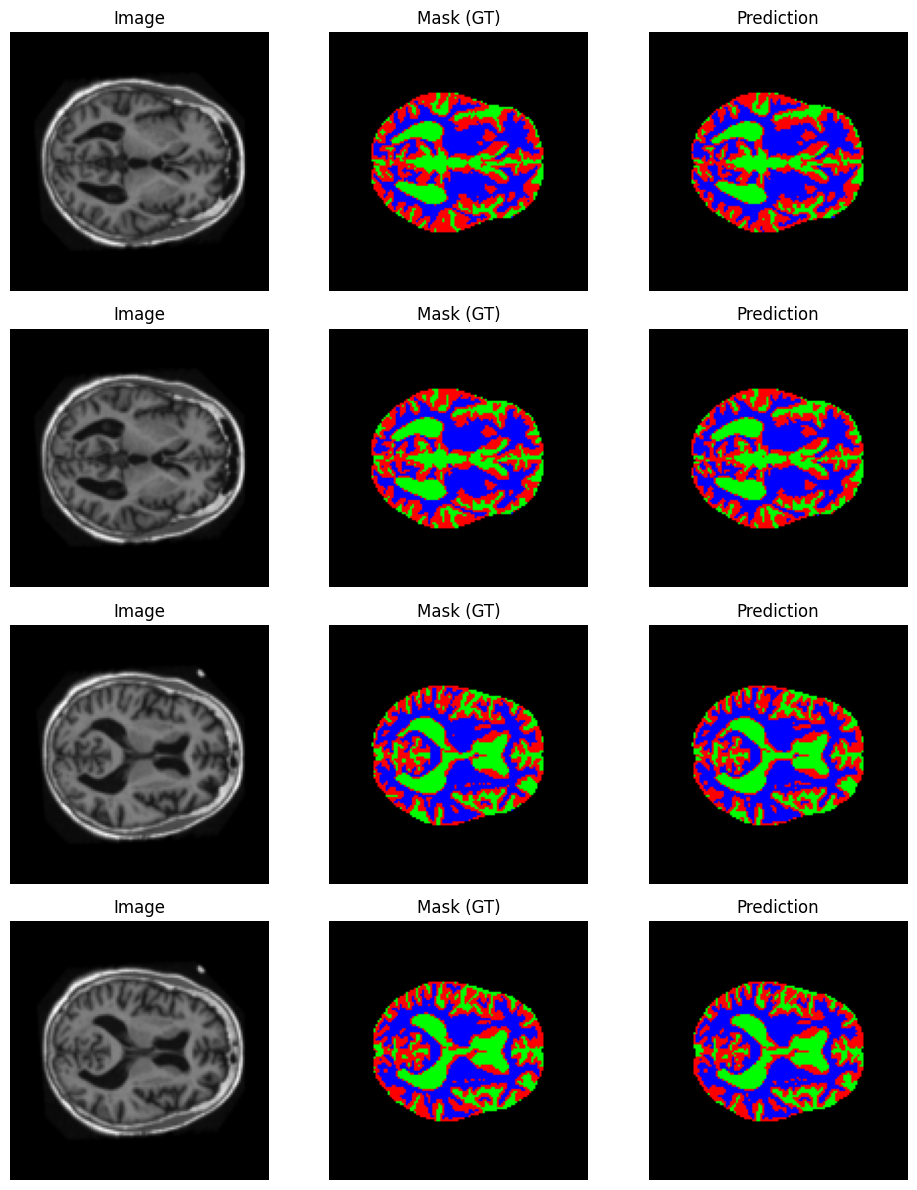


Inference demo (one batch):
Per-class DSC on demo batch: ['0.998', '0.949', '0.916', '0.953']


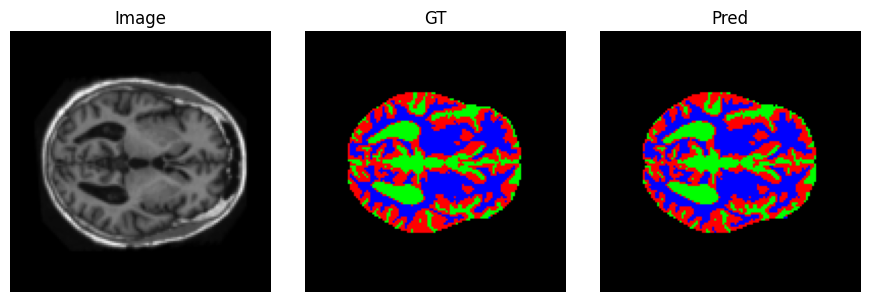

In [12]:
# ============================
# U-Net (multi-class, one-hot) MRI Segmentation — Colab
# Uses keras_png_slices_data.zip (images: case_..., masks: seg_...)
# Trains with CE + Soft Dice, reports per-class DSC, shows overlays, and runs inference.
# ============================

# ---- 0) Upload & unzip (Colab) ----
from google.colab import files
import zipfile, shutil
from pathlib import Path

print("👉 Upload keras_png_slices_data.zip")
uploaded = files.upload()
zip_name = next(iter(uploaded))  # first uploaded file

with zipfile.ZipFile(f"/content/{zip_name}", 'r') as zf:
    zf.extractall("/content")

DATA_ROOT = Path("/content/keras_png_slices_data")
assert DATA_ROOT.exists(), "Unzip failed. /content/keras_png_slices_data not found."
print("✅ Unzipped to:", DATA_ROOT)

# (Rangpur note) — if running on the cluster:
# DATA_ROOT = Path("/home/groups/comp3710/oasis_preprocessed")  # adjust to the PNG/NIfTI layout used on Rangpur

# ---- 1) Imports & config ----
import re, random, numpy as np
from PIL import Image
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
from PIL import Image as PIL_Image
import matplotlib.pyplot as plt

SEED      = 42
IMG_SIZE  = 128           # use 192 or 256 on Rangpur for best DSC (more compute)
BATCH     = 16
EPOCHS    = 5             # set 1 for smoke test; 15–30 for >0.9 DSC (dataset dependent)
LR        = 3e-4
DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
print("Device:", DEVICE)

# ---- 2) Robust pairing (case_###_slice_k <-> seg_###_slice_k) ----
ID_SLICE_RE = re.compile(r'(?:case|seg)_(\d+)_slice_(\d+)\.nii\.png$', re.IGNORECASE)

def _index_masks(msk_dir: Path):
    idx = {}
    for mp in sorted(msk_dir.glob("*.png")):
        m = ID_SLICE_RE.search(mp.name)
        if not m:
            continue
        mid, mslice = int(m.group(1)), int(m.group(2))
        idx[(mid, mslice)] = mp
    if not idx:
        raise FileNotFoundError(f"No mask PNGs found in {msk_dir}")
    return idx

def _paired_paths(root: Path, split="train"):
    # Keras zip uses these subdirs:
    # images: keras_png_slices_<split>/
    # masks : keras_png_slices_seg_<split>/
    img_dir = root / f"keras_png_slices_{split}"
    msk_dir = root / f"keras_png_slices_seg_{split}"
    if not img_dir.exists(): raise FileNotFoundError(f"Missing images dir: {img_dir}")
    if not msk_dir.exists(): raise FileNotFoundError(f"Missing masks dir: {msk_dir}")

    mask_index = _index_masks(msk_dir)
    imgs, msks = [], []

    for ip in sorted(img_dir.glob("*.png")):
        m = ID_SLICE_RE.search(ip.name)
        if not m:
            continue
        iid, islice = int(m.group(1)), int(m.group(2))
        mp = mask_index.get((iid, islice))
        if mp is None:
            raise FileNotFoundError(
                f"No mask for {ip.name} in {msk_dir} "
                f"(expected seg_{iid}_slice_{islice}.nii.png)."
            )
        imgs.append(ip); msks.append(mp)

    if len(imgs) == 0:
        raise FileNotFoundError(f"No images found in {img_dir}")
    return imgs, msks

# ---- 3) Dataset with auto class mapping (categorical) ----
class SegSlicesDataset(Dataset):
    """
    Loads PNG pairs (image, mask).
    - Auto-discovers unique mask values across a sample and maps them to {0..C-1}
    - Returns: image [1,H,W] float in [0,1], target_idx [H,W] long (class indices)
    """
    def __init__(self, root: Path, split="train", size=IMG_SIZE, scan_limit=3000):
        self.imgs, self.msks = _paired_paths(root, split)
        self.size = size
        # discover label values from a subset of masks
        vals = set()
        for p in self.msks[:min(len(self.msks), scan_limit)]:
            a = np.array(Image.open(p).convert("L"))
            vals.update(np.unique(a).tolist())
        vals = sorted(int(v) for v in vals)
        # If masks are 0/255 -> treat as [0,255] => map to [0,1]
        if vals and max(vals) > 1 and set(vals).issubset({0, 255}):
            vals = [0, 255]
        self.label_values = vals
        self.value_to_index = {v:i for i, v in enumerate(self.label_values)}
        self.num_classes = max(2, len(self.label_values))  # at least binary
        print(f"[{split}] discovered label values: {self.label_values} -> num_classes={self.num_classes}")

        # fast LUT for uint8 masks
        lut = np.zeros(256, dtype=np.uint8)
        for v, i in self.value_to_index.items():
            lut[int(v)] = int(i)
        self._lut = lut

    def __len__(self): return len(self.imgs)

    def __getitem__(self, idx):
        img = Image.open(self.imgs[idx]).convert("L")
        msk = Image.open(self.msks[idx]).convert("L")  # 0/255 or multi-label codes

        img = img.resize((self.size, self.size), resample=PIL_Image.BILINEAR)
        msk = msk.resize((self.size, self.size), resample=PIL_Image.NEAREST)

        x = TF.to_tensor(img)  # [1,H,W], float
        a = np.array(msk, dtype=np.uint8)
        y_idx = self._lut[a]   # [H,W] uint8 indices 0..C-1
        y_idx = torch.from_numpy(y_idx.astype(np.int64))  # long

        return x, y_idx

# ---- 4) Dataloaders (train/val) ----
train_ds = SegSlicesDataset(DATA_ROOT, "train", IMG_SIZE)
val_ds   = SegSlicesDataset(DATA_ROOT, "validate", IMG_SIZE)

# sanity: ensure same class count across splits
NUM_CLASSES = max(train_ds.num_classes, val_ds.num_classes)
print(f"NUM_CLASSES = {NUM_CLASSES}")

train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True,  num_workers=2, pin_memory=True)
val_dl   = DataLoader(val_ds,   batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=True)

# ---- 5) U-Net (categorical output C channels) ----
class DoubleConv(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
        )
    def forward(self, x): return self.net(x)

class UNet(nn.Module):
    def __init__(self, num_classes, base=32):
        super().__init__()
        self.d1 = DoubleConv(1, base)
        self.p1 = nn.MaxPool2d(2)
        self.d2 = DoubleConv(base, base*2)
        self.p2 = nn.MaxPool2d(2)
        self.d3 = DoubleConv(base*2, base*4)
        self.p3 = nn.MaxPool2d(2)
        self.b  = DoubleConv(base*4, base*8)
        self.u3 = nn.ConvTranspose2d(base*8, base*4, 2, stride=2)
        self.c3 = DoubleConv(base*8, base*4)
        self.u2 = nn.ConvTranspose2d(base*4, base*2, 2, stride=2)
        self.c2 = DoubleConv(base*4, base*2)
        self.u1 = nn.ConvTranspose2d(base*2, base, 2, stride=2)
        self.c1 = DoubleConv(base*2, base)
        self.out = nn.Conv2d(base, num_classes, 1)  # Categorical logits
    def forward(self, x):
        c1 = self.d1(x); p1 = self.p1(c1)
        c2 = self.d2(p1); p2 = self.p2(c2)
        c3 = self.d3(p2); p3 = self.p3(c3)
        b  = self.b(p3)
        u3 = self.u3(b); c3d = self.c3(torch.cat([u3, c3], dim=1))
        u2 = self.u2(c3d); c2d = self.c2(torch.cat([u2, c2], dim=1))
        u1 = self.u1(c2d); c1d = self.c1(torch.cat([u1, c1], dim=1))
        return self.out(c1d)  # [B,C,H,W]

model = UNet(NUM_CLASSES, base=32).to(DEVICE)

# ---- 6) Loss = CE + SoftDice (one-hot) ----
class SoftDiceLoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
    def forward(self, logits, target_1h):
        # logits: [B,C,H,W], target_1h: [B,C,H,W]
        probs = F.softmax(logits, dim=1)
        dims = (0,2,3)
        inter = (probs * target_1h).sum(dim=dims)
        den   = probs.sum(dim=dims) + target_1h.sum(dim=dims)
        dice  = (2*inter + self.eps) / (den + self.eps)   # [C]
        # Return 1 - mean over classes (includes background by default)
        return 1 - dice.mean()

def per_class_dice(logits, target_idx, num_classes):
    with torch.no_grad():
        probs = F.softmax(logits, dim=1)                           # [B,C,H,W]
        target_1h = F.one_hot(target_idx, num_classes).permute(0,3,1,2).float()
        dims = (0,2,3)
        inter = (probs * target_1h).sum(dim=dims)                  # [C]
        den   = probs.sum(dim=dims) + target_1h.sum(dim=dims)      # [C]
        dice  = (2*inter + 1e-6) / (den + 1e-6)                    # [C]
        return dice  # tensor length C

ce_loss   = nn.CrossEntropyLoss()
dice_loss = SoftDiceLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

# ---- 7) Train & validate ----
def run_epoch(ep, train=True):
    loader = train_dl if train else val_dl
    model.train(mode=train)
    total, ce_sum, dice_sum = 0, 0.0, 0.0
    pcs_sum = torch.zeros(NUM_CLASSES, device=DEVICE)

    for xb, y_idx in loader:
        xb, y_idx = xb.to(DEVICE), y_idx.to(DEVICE)
        logits = model(xb)
        target_1h = F.one_hot(y_idx, NUM_CLASSES).permute(0,3,1,2).float()

        ce = ce_loss(logits, y_idx)
        dl = dice_loss(logits, target_1h)
        loss = ce + dl

        if train:
            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()

        # metrics
        with torch.no_grad():
            pcs = per_class_dice(logits, y_idx, NUM_CLASSES)  # [C]
        bs = y_idx.size(0)
        total += bs
        ce_sum += ce.item() * bs
        dice_sum += (1 - dl.item()) * bs  # "dice" = 1 - loss_component
        pcs_sum += pcs * bs

    return (ce_sum/total, dice_sum/total, (pcs_sum/total).tolist())

best_mean = 0.0
for ep in range(1, EPOCHS+1):
    tr_ce, tr_dice, tr_pcs = run_epoch(ep, train=True)
    va_ce, va_dice, va_pcs = run_epoch(ep, train=False)
    mean_va = np.mean(va_pcs)

    pcs_str = " | ".join([f"c{i}:{d:.3f}" for i,d in enumerate(va_pcs)])
    print(f"Epoch {ep:02d} | train CE {tr_ce:.3f} Dice {tr_dice:.3f} "
          f"| val CE {va_ce:.3f} Dice {va_dice:.3f} | val per-class: {pcs_str} | mean {mean_va:.3f}")

    if mean_va > best_mean:
        best_mean = mean_va
        torch.save({"model": model.state_dict(),
                    "num_classes": NUM_CLASSES,
                    "img_size": IMG_SIZE}, "/content/best_unet.pth")

print(f"\n✅ Best mean DSC: {best_mean:.3f}")
print("Saved model -> /content/best_unet.pth")

# ---- 8) Visualise overlays & inference demo ----
import matplotlib.pyplot as plt
import matplotlib as mpl

# simple color map for up to 6 classes
PALETTE = np.array([
    [0, 0, 0],        # 0 background
    [0, 255, 0],      # 1
    [255, 0, 0],      # 2
    [0, 0, 255],      # 3
    [255, 255, 0],    # 4
    [255, 0, 255],    # 5
], dtype=np.uint8)

def colorize(mask_idx):
    # mask_idx: [H,W] int
    H, W = mask_idx.shape
    K = min(PALETTE.shape[0], NUM_CLASSES)
    out = np.zeros((H, W, 3), dtype=np.uint8)
    for k in range(K):
        out[mask_idx==k] = PALETTE[k]
    return out

@torch.no_grad()
def show_batch_predictions(loader, n=4):
    xb, yb = next(iter(loader))
    xb = xb.to(DEVICE)
    logits = model(xb)
    pred = logits.argmax(1).cpu()        # [B,H,W]
    xb   = xb.cpu()
    yb   = yb[:pred.size(0)]
    n    = min(n, xb.size(0))

    fig, axes = plt.subplots(n, 3, figsize=(10, 3*n))
    if n == 1: axes = np.array([axes])
    for i in range(n):
        axes[i,0].imshow(xb[i,0], cmap="gray"); axes[i,0].set_title("Image"); axes[i,0].axis("off")
        axes[i,1].imshow(colorize(yb[i].numpy())); axes[i,1].set_title("Mask (GT)"); axes[i,1].axis("off")
        axes[i,2].imshow(colorize(pred[i].numpy())); axes[i,2].set_title("Prediction"); axes[i,2].axis("off")
    plt.tight_layout(); plt.show()

print("\nSample validation predictions:")
show_batch_predictions(val_dl, n=4)

# Inference demo on one validation slice
@torch.no_grad()
def run_inference_demo():
    xb, yb = next(iter(val_dl))
    xb = xb.to(DEVICE)
    logits = model(xb)
    pred = logits.argmax(1).cpu()
    dscs = per_class_dice(logits, yb.to(DEVICE), NUM_CLASSES).cpu().numpy()
    print("Per-class DSC on demo batch:", [f"{d:.3f}" for d in dscs])
    # show first slice only
    img = xb[0,0].cpu().numpy()
    gt  = yb[0].numpy()
    pd  = pred[0].numpy()
    fig, ax = plt.subplots(1,3,figsize=(9,3))
    ax[0].imshow(img, cmap="gray"); ax[0].set_title("Image"); ax[0].axis("off")
    ax[1].imshow(colorize(gt));     ax[1].set_title("GT");    ax[1].axis("off")
    ax[2].imshow(colorize(pd));     ax[2].set_title("Pred");  ax[2].axis("off")
    plt.tight_layout(); plt.show()

print("\nInference demo (one batch):")
run_inference_demo()


In [13]:
import torch, numpy as np
import torch.nn.functional as F

@torch.no_grad()
def dice_per_class_on_loader(model, loader, num_classes, device, ignore_background=True):
    model.eval()
    sums = torch.zeros(num_classes, device=device)
    batches = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)                         # [B,C,H,W]
        probs  = F.softmax(logits, dim=1)         # [B,C,H,W]
        tgt_1h = F.one_hot(yb, num_classes).permute(0,3,1,2).float()
        dims   = (0,2,3)
        inter  = (probs * tgt_1h).sum(dim=dims)   # [C]
        den    = probs.sum(dim=dims) + tgt_1h.sum(dim=dims)
        dice   = (2*inter + 1e-6) / (den + 1e-6)  # [C]
        sums  += dice
        batches += 1

    dsc = (sums / max(1, batches)).detach().cpu().numpy()  # per-class DSC
    mean_all = float(dsc.mean())
    if ignore_background and len(dsc) > 1:
        mean_no_bg = float(dsc[1:].mean())
    else:
        mean_no_bg = mean_all
    return dsc, mean_all, mean_no_bg

# ---- Validation accuracy (DSC) ----
dsc_val, mean_all_val, mean_no_bg_val = dice_per_class_on_loader(model, val_dl, NUM_CLASSES, DEVICE, ignore_background=True)
print("Per-class DSC (incl. background):", [f"{d:.3f}" for d in dsc_val])
print(f"Mean DSC (all classes): {mean_all_val:.3f}")
print(f"Mean DSC (no background): {mean_no_bg_val:.3f}")
if NUM_CLASSES > 1:
    print("≥0.90 on ALL non-background labels:",
          bool((np.array(dsc_val[1:]) >= 0.90).all()))


Per-class DSC (incl. background): ['0.999', '0.912', '0.938', '0.963']
Mean DSC (all classes): 0.953
Mean DSC (no background): 0.938
≥0.90 on ALL non-background labels: True


In [15]:
# ===============================
# Brain MRI generation via WGAN-GP (PyTorch)
# - Works in Colab (upload zip) or locally (use a local path)
# - Trains on 128x128 grayscale slices
# - Saves samples to ./samples and loss plot to losses.png
# ===============================

import os, sys, glob, math, random, zipfile
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid, save_image
import torchvision.transforms as T
from torchvision.transforms import InterpolationMode as IM

# ---------------- Config ----------------
SEED       = 42
IMG_SIZE   = 128
BATCH_SIZE = 64
Z_DIM      = 128
G_BASE     = 64          # Generator base channels
D_BASE     = 64          # Critic base channels
LR         = 2e-4
BETA1      = 0.0
BETA2      = 0.9
LAMBDA_GP  = 10.0
N_CRITIC   = 5
EPOCHS     = 20          # set lower (e.g., 5) for a quick smoke test

SAVE_EVERY = 500         # save sample grid every N critic steps
SAMPLES_DIR= "samples"
os.makedirs(SAMPLES_DIR, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
print("Device:", device)

# ------------- Data setup -------------
# A) COLAB: upload & unzip
def in_colab():
    try:
        import google.colab  # noqa
        return True
    except:
        return False

DATA_ROOT = None  # will set below

if in_colab():
    from google.colab import files
    print("👉 Upload keras_png_slices_data.zip (or skip if folder already exists in /content)")
    uploaded = files.upload()
    if uploaded:
        zip_name = next(iter(uploaded))
        with zipfile.ZipFile(f"/content/{zip_name}", "r") as zf:
            zf.extractall("/content")
    if Path("/content/keras_png_slices_data").exists():
        DATA_ROOT = Path("/content/keras_png_slices_data")
    else:
        # If you manually mounted /content/drive or copied elsewhere, set it here:
        raise FileNotFoundError("keras_png_slices_data folder not found after upload.")
else:
    # B) LOCAL/WINDOWS: set your local zip or extracted folder
    #   Example from your message:
    #   zip_path = r"C:\Users\darsh\OneDrive\Desktop\keras_png_slices_data.zip"
    #   If you already extracted it, set extracted_dir instead.
    zip_path = r"C:\Users\darsh\OneDrive\Desktop\keras_png_slices_data.zip"
    extracted_dir = Path(zip_path).with_suffix("")  # same folder name, no .zip
    if not extracted_dir.exists():
        print(f"[Unzip] Extracting {zip_path} -> {extracted_dir}")
        with zipfile.ZipFile(zip_path, "r") as zf:
            zf.extractall(extracted_dir.parent)
    DATA_ROOT = extracted_dir
    if not DATA_ROOT.exists():
        raise FileNotFoundError(f"DATA_ROOT not found at {DATA_ROOT}")

# On Rangpur, override:
# DATA_ROOT = Path("/home/groups/comp3710/oasis_preprocessed/png")  # adjust if needed

print("DATA_ROOT:", DATA_ROOT)

# The Keras zip has images in: keras_png_slices_train/*.png
TRAIN_DIR = DATA_ROOT / "keras_png_slices_train"
if not TRAIN_DIR.exists():
    # Fallback: search for a folder that contains many .png slices
    candidates = [p for p in DATA_ROOT.rglob("*.png")]
    if not candidates:
        raise FileNotFoundError("No PNG images found under DATA_ROOT.")
    TRAIN_DIR = Path(os.path.commonpath([str(p.parent) for p in candidates]))
    print("[Info] Using detected image dir:", TRAIN_DIR)

# ------------- Dataset -------------
class SliceFolder(Dataset):
    def __init__(self, root_dir, img_size=128):
        self.paths = sorted(glob.glob(str(Path(root_dir)/"*.png")))
        if len(self.paths) == 0:
            raise FileNotFoundError(f"No .png images in {root_dir}")
        self.tfm = T.Compose([
            T.Grayscale(num_output_channels=1),
            T.Resize(img_size, interpolation=IM.BILINEAR),
            T.CenterCrop(img_size),
            T.ToTensor(),                      # [1,H,W] in [0,1]
            T.Normalize(mean=[0.5], std=[0.5]) # -> [-1,1] for Tanh gen
        ])
    def __len__(self): return len(self.paths)
    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        x = self.tfm(img)
        return x

dataset = SliceFolder(TRAIN_DIR, IMG_SIZE)
loader  = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True, drop_last=True)
print("Num training images:", len(dataset))

# ------------- Models (WGAN-GP) -------------
# Generator: z -> 1x128x128
class Generator(nn.Module):
    def __init__(self, z_dim=128, base=64):
        super().__init__()
        # start from 4x4
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, base*16, 4, 1, 0, bias=False), nn.BatchNorm2d(base*16), nn.ReLU(True),  # 4x4
            nn.ConvTranspose2d(base*16, base*8, 4, 2, 1, bias=False), nn.BatchNorm2d(base*8), nn.ReLU(True),  # 8x8
            nn.ConvTranspose2d(base*8, base*4, 4, 2, 1, bias=False), nn.BatchNorm2d(base*4), nn.ReLU(True),   # 16x16
            nn.ConvTranspose2d(base*4, base*2, 4, 2, 1, bias=False), nn.BatchNorm2d(base*2), nn.ReLU(True),   # 32x32
            nn.ConvTranspose2d(base*2, base,   4, 2, 1, bias=False), nn.BatchNorm2d(base),   nn.ReLU(True),   # 64x64
            nn.ConvTranspose2d(base, 1,        4, 2, 1, bias=False),
            nn.Tanh()  # -> [-1,1]
        )
    def forward(self, z):  # z: [B, z_dim]
        return self.net(z.view(z.size(0), z.size(1), 1, 1))

# Critic: 1x128x128 -> scalar
class Critic(nn.Module):
    def __init__(self, base=64):
        super().__init__()
        def block(i, o, bn=True):
            layers = [nn.Conv2d(i, o, 4, 2, 1), nn.LeakyReLU(0.2, inplace=True)]
            if bn: layers.insert(1, nn.InstanceNorm2d(o, affine=True))
            return layers
        self.net = nn.Sequential(
            *block(1, base, bn=False),        # 64x64
            *block(base, base*2),             # 32x32
            *block(base*2, base*4),           # 16x16
            *block(base*4, base*8),           # 8x8
            *block(base*8, base*16),          # 4x4
            nn.Conv2d(base*16, 1, 4, 1, 0)    # 1x1
        )
    def forward(self, x):
        out = self.net(x)
        return out.view(-1)  # [B]

G = Generator(Z_DIM, G_BASE).to(device)
D = Critic(D_BASE).to(device)
print(f"Params — G: {sum(p.numel() for p in G.parameters())/1e6:.2f}M | D: {sum(p.numel() for p in D.parameters())/1e6:.2f}M")

opt_G = torch.optim.Adam(G.parameters(), lr=LR, betas=(BETA1, BETA2))
opt_D = torch.optim.Adam(D.parameters(), lr=LR, betas=(BETA1, BETA2))

# ------------- WGAN-GP helpers -------------
def gradient_penalty(D, real, fake):
    B = real.size(0)
    eps = torch.rand(B, 1, 1, 1, device=real.device)
    interp = eps*real + (1-eps)*fake
    interp.requires_grad_(True)
    d_interp = D(interp)
    grads = torch.autograd.grad(outputs=d_interp, inputs=interp,
                                grad_outputs=torch.ones_like(d_interp),
                                create_graph=True, retain_graph=True, only_inputs=True)[0]
    grads = grads.view(B, -1)
    gp = ((grads.norm(2, dim=1) - 1.0) ** 2).mean()
    return gp

@torch.no_grad()
def sample_and_save(step, fixed_z=None, n=16):
    G.eval()
    if fixed_z is None:
        z = torch.randn(n, Z_DIM, device=device)
    else:
        z = fixed_z
    fakes = G(z).cpu()          # [-1,1]
    imgs = (fakes + 1)/2        # [0,1]
    grid = make_grid(imgs, nrow=int(math.sqrt(n)), normalize=False)
    save_path = os.path.join(SAMPLES_DIR, f"step_{step:07d}.png")
    save_image(grid, save_path)
    if step % (SAVE_EVERY*2) == 0:
        print(f"[Saved] {save_path}")

# ------------- Train -------------
fixed_z = torch.randn(16, Z_DIM, device=device)
g_losses, d_losses = [], []
global_step = 0

for epoch in range(1, EPOCHS+1):
    for real in loader:
        real = real.to(device)

        # -- Train Critic N_CRITIC times
        for _ in range(N_CRITIC):
            z = torch.randn(real.size(0), Z_DIM, device=device)
            fake = G(z).detach()
            d_real = D(real)
            d_fake = D(fake)
            gp = gradient_penalty(D, real, fake)
            d_loss = (d_fake - d_real).mean() + LAMBDA_GP * gp
            opt_D.zero_grad(set_to_none=True)
            d_loss.backward()
            opt_D.step()
            d_losses.append(d_loss.item())
            global_step += 1
            if global_step % SAVE_EVERY == 0:
                sample_and_save(global_step, fixed_z=fixed_z, n=16)

        # -- Train Generator 1 time
        z = torch.randn(real.size(0), Z_DIM, device=device)
        fake = G(z)
        g_loss = -D(fake).mean()
        opt_G.zero_grad(set_to_none=True)
        g_loss.backward()
        opt_G.step()
        g_losses.append(g_loss.item())

    print(f"Epoch {epoch}/{EPOCHS} | D: {np.mean(d_losses[-len(loader):]):.4f} | G: {np.mean(g_losses[-len(loader):]):.4f}")

# ------------- Save final samples & losses plot -------------
sample_and_save(global_step + 1, fixed_z=fixed_z, n=16)
torch.save({"G": G.state_dict(), "D": D.state_dict(), "z_dim": Z_DIM}, "wgan_gp_mri.pth")
print("Saved weights -> wgan_gp_mri.pth")

plt.figure(figsize=(8,4))
plt.plot(g_losses, label="G loss")
plt.plot(d_losses, label="D loss", alpha=0.7)
plt.xlabel("Training steps"); plt.ylabel("Loss"); plt.legend(); plt.tight_layout()
plt.savefig("losses.png"); plt.close()
print("Saved loss plot -> losses.png")

print(f"Sample images saved in: {SAMPLES_DIR}")


Device: cuda
👉 Upload keras_png_slices_data.zip (or skip if folder already exists in /content)


Saving keras_png_slices_data.zip to keras_png_slices_data (3).zip
DATA_ROOT: /content/keras_png_slices_data
Num training images: 9664
Params — G: 13.24M | D: 11.16M
Epoch 1/20 | D: -19.4591 | G: -11.3126
[Saved] samples/step_0001000.png
Epoch 2/20 | D: -10.5962 | G: -27.6553
[Saved] samples/step_0002000.png
Epoch 3/20 | D: -8.3405 | G: -19.8279
[Saved] samples/step_0003000.png
Epoch 4/20 | D: -6.9866 | G: -14.4627
Epoch 5/20 | D: -6.3794 | G: -11.4618
[Saved] samples/step_0004000.png
Epoch 6/20 | D: -6.1109 | G: -9.8945
[Saved] samples/step_0005000.png
Epoch 7/20 | D: -5.9621 | G: -6.5315
[Saved] samples/step_0006000.png
Epoch 8/20 | D: -5.9511 | G: -1.8359
Epoch 9/20 | D: -5.8978 | G: 0.8479
[Saved] samples/step_0007000.png
Epoch 10/20 | D: -5.9910 | G: 4.3919
[Saved] samples/step_0008000.png
Epoch 11/20 | D: -5.9098 | G: 7.3272
[Saved] samples/step_0009000.png
Epoch 12/20 | D: -6.0497 | G: 10.5721
Epoch 13/20 | D: -6.3004 | G: 12.6630
[Saved] samples/step_0010000.png
Epoch 14/20 | D: